In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. 임의의 데이터셋 생성
np.random.seed(42)  # 매번 동일한 난수를 생성하기 위해 시드 고정
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
# 2. Scikit-Learn을 사용하여 선형 회귀 모델 구현
from sklearn.linear_model import LinearRegression

In [4]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)  # 모델 학습

LinearRegression()

In [7]:
print("Intercept:", lin_reg.intercept_)
print("Coefficient:", lin_reg.coef_)

Intercept: [4.21509616]
Coefficient: [[2.77011339]]


In [8]:
# 3. Scikit-Learn을 사용하지 않고 선형 회귀 알고리즘 직접 구현
X_b = np.c_[np.ones((100, 1)), X]  # bias항 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # normal equation으로 최적 파라미터 계산

print("Intercept:", theta_best[0])
print("Coefficient:", theta_best[1])

Intercept: [4.21509616]
Coefficient: [2.77011339]


In [9]:
# 4. 학습된 모델의 예측 결과 출력 및 시각화
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 새로운 데이터에 대해서도 bias항 추가
y_predict = X_new_b.dot(theta_best)  # 직접 구현한 모델로 예측
print("Prediction (without Scikit-Learn):")
print(y_predict)

Prediction (without Scikit-Learn):
[[4.21509616]
 [9.75532293]]


In [11]:
y_predict = lin_reg.predict(X_new)  # Scikit-Learn 모델로 예측
print("Prediction (with Scikit-Learn):")
print(y_predict)

Prediction (with Scikit-Learn):
[[4.21509616]
 [9.75532293]]


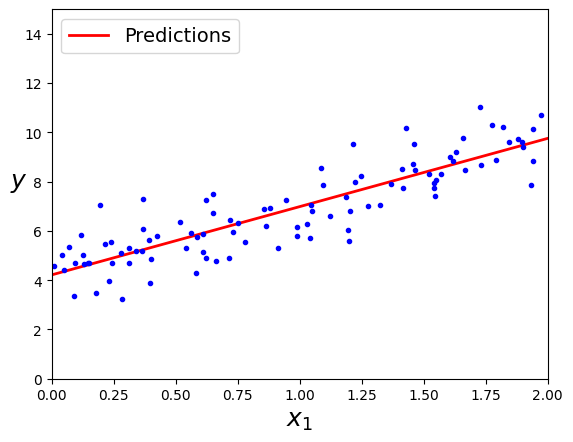

In [12]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [14]:
# Scikit-Learn 모델의 예측 결과에 대한 평가
y_pred_sklearn = lin_reg.predict(X)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
mae_sklearn = mean_absolute_error(y, y_pred_sklearn)
r2_sklearn = r2_score(y, y_pred_sklearn)

print("Scikit-Learn Linear Regression:")
print("MSE:", mse_sklearn)
print("MAE:", mae_sklearn)
print("R-squared:", r2_sklearn)

Scikit-Learn Linear Regression:
MSE: 0.8065845639670531
MAE: 0.7010426719637758
R-squared: 0.7692735413614223


In [15]:
# 직접 구현한 모델의 예측 결과에 대한 평가
y_pred_manual = X_b.dot(theta_best)
mse_manual = mean_squared_error(y, y_pred_manual)
mae_manual = mean_absolute_error(y, y_pred_manual)
r2_manual = r2_score(y, y_pred_manual)

print("\nManually Implemented Linear Regression:")
print("MSE:", mse_manual)
print("MAE:", mae_manual)
print("R-squared:", r2_manual)


Manually Implemented Linear Regression:
MSE: 0.8065845639670534
MAE: 0.7010426719637757
R-squared: 0.7692735413614223


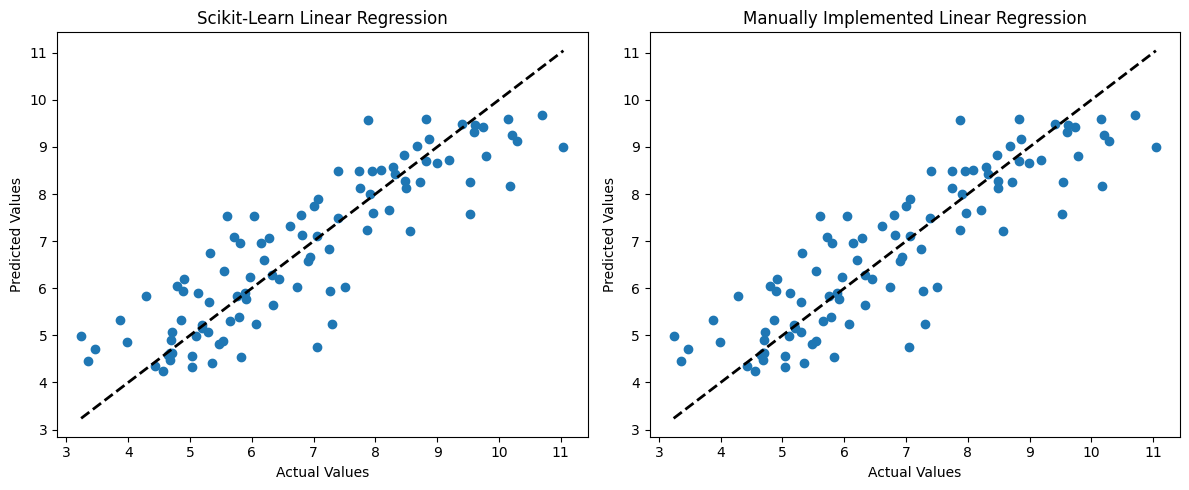

In [16]:
plt.figure(figsize=(12, 5))

# Scikit-Learn 모델의 산점도
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred_sklearn)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scikit-Learn Linear Regression')

# 직접 구현한 모델의 산점도
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred_manual)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Manually Implemented Linear Regression')

plt.tight_layout()
plt.show()